In [40]:
import keras
from keras import layers

In [2]:
from keras.datasets import mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train[0])

(60000, 28, 28)
5


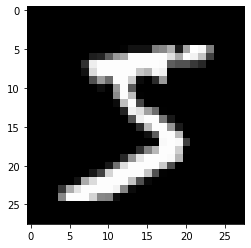

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()

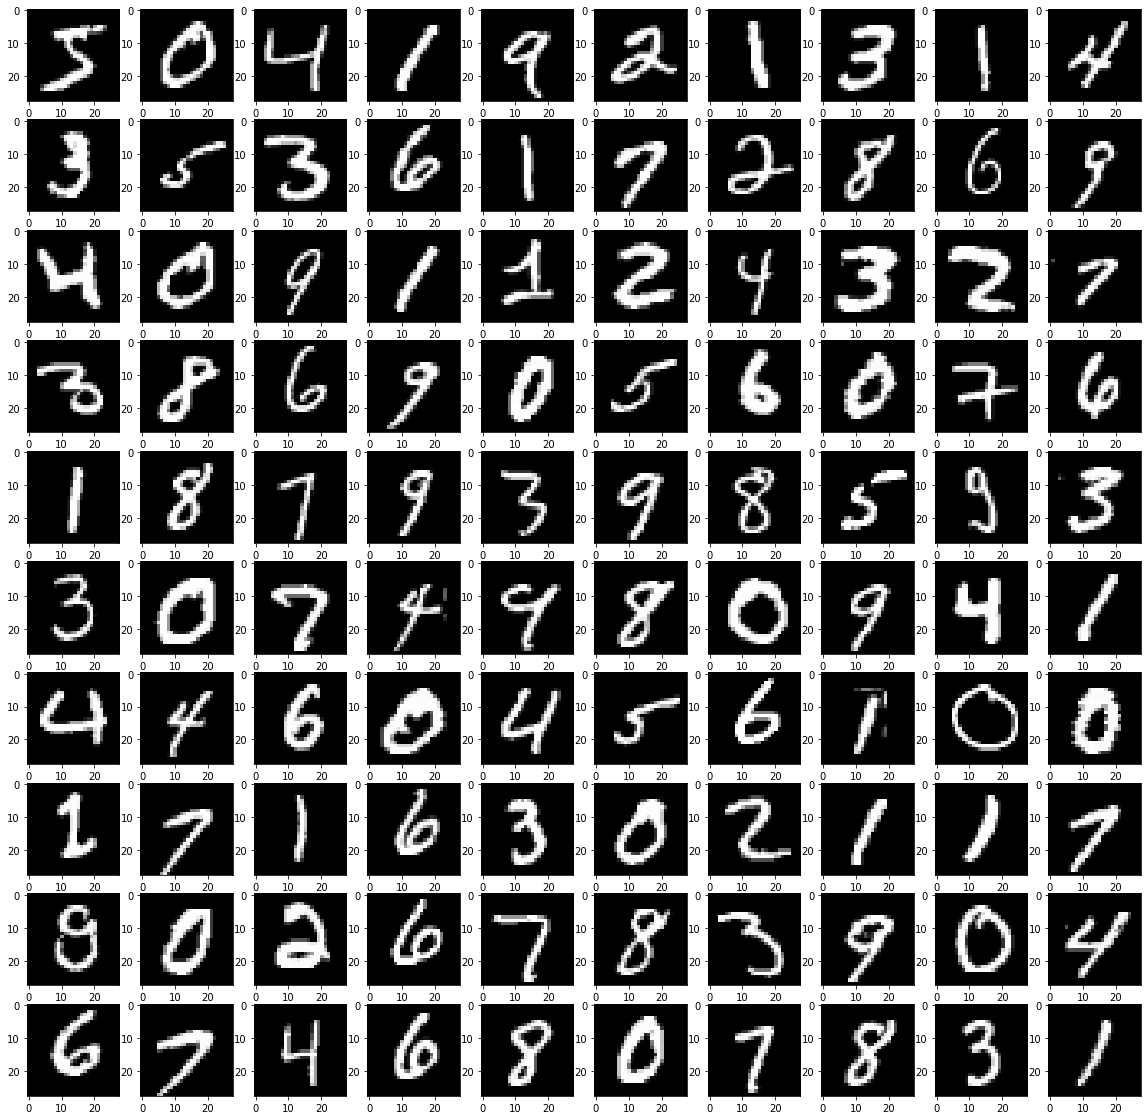

In [37]:
fig = plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')

plt.tight_layout()
plt.show()

In [46]:
latent_dim = 100

#重み初期化
init = keras.initializers.RandomNormal(stddev=0.02)

#Adam最適化
adam = keras.optimizers.Adam(lr=0.0002, beta_1=0.5, clipvalue=1.0, decay=1e-8)

In [44]:
generator_input = keras.Input(shape=(latent_dim,))

#潜在変数を７*7*256channelに変換
x = layers.Dense(7 * 7 * 256, kernel_initializer=init, bias_initializer='zeros')(generator_input)
x = layers.LeakyReLU(0.2)(x)
x = layers.Reshape((7, 7, 256))(x)

#7*7*256channel→14*14*128channel
x = layers.Conv2DTranspose(128, 5, strides=2, padding='same', kernel_initializer=init, bias_initializer='zeros')(x)
x = layers.LeakyReLU(0.2)(x)

#14*14*128channel→28*28*64channel
x = layers.Conv2DTranspose(64, 5, strides=2, padding='same', kernel_initializer=init, bias_initializer='zeros')(x)
x = layers.LeakyReLU(0.2)(x)

#28*28*64channel→28*28*1channel
x = layers.Conv2D(1, 5, activation='tanh', padding='same', kernel_initializer=init, bias_initializer='zeros')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 14, 14, 128)       819328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 28, 28, 64)        204864    
__________

In [47]:
#generatorモデルを作成する。
#100次元のノイズを入力し、28*28*1の配列を生成
def build_generator(self):
    generator_input = keras.Input(shape=(latent_dim,))
    
    #潜在変数を７*7*256channelに変換
    x = layers.Dense(7 * 7 * 256, kernel_initializer=init, bias_initializer='zeros')(generator_input)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Reshape((7, 7, 256))(x)
    
    #7*7*256channel→14*14*128channel
    x = layers.Conv2DTranspose(128, 5, strides=2, padding='same', kernel_initializer=init, bias_initializer='zeros')(x)
    x = layers.LeakyReLU(0.2)(x)
    
    #14*14*128channel→28*28*64channel
    x = layers.Conv2DTranspose(64, 5, strides=2, padding='same', kernel_initializer=init, bias_initializer='zeros')(x)
    x = layers.LeakyReLU(0.2)(x)
    
    #28*28*64channel→28*28*1channel
    x = layers.Conv2D(1, 5, activation='tanh', padding='same', kernel_initializer=init, bias_initializer='zeros')(x)
    generator = keras.models.Model(generator_input, x)
    return generator

In [48]:
#discriminatorモデルを作成する。
def build_discriminator(self):
    discriminator_input = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(128, 5, strides=2,padding='same',kernel_initializer=init)(discriminator_input)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(256, 5, strides=2,padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    discriminator = keras.models.Model(discriminator_input, x)
    discriminator_optimizer  = adam
    discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')
    return discriminator